<a href="https://colab.research.google.com/github/prajwalwanjari/Design_optimization_assignments/blob/main/DO_HW3_Prajwal_Wanjari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Design Optimization - HW3**

**Prajwal Wanjari**

**1222575718**

**Google collab link - https://colab.research.google.com/drive/1QSzeh6cd1ZGihef1RoiVCigkW3RyaP7s?usp=sharing**

### **Q.1**

Vapor-liquid equilibria data are correlated using two adjustable parameters $A_{12}$ and $A_{21}$ per binary
mixture. For low pressures, the equilibrium relation can be formulated as:

$$
\begin{aligned}
p = & x_1\exp\left(A_{12}\left(\frac{A_{21}x_2}{A_{12}x_1+A_{21}x_2}\right)^2\right)p_{1}^{sat}\\
& + x_2\exp\left(A_{21}\left(\frac{A_{12}x_1}{A_{12}x_1+A_{21}x_2}\right)^2\right)p_{2}^{sat}.
\end{aligned}
$$

where 1 and 2 represents water 1,4 dioxane respectively.

Here the saturation pressures are given by the Antoine equation

$$
\log_{10}(p^{sat}) = a_1 - \frac{a_2}{T + a_3},
$$

where $T = 20$($^{\circ}{\rm C}$) and $a_{1,2,3}$ for a water - 1,4 dioxane
system is given below.

|             | $a_1$     | $a_2$      | $a_3$     |
|:------------|:--------|:---------|:--------|
| Water       | 8.07131 | 1730.63  | 233.426 |
| 1,4 dioxane | 7.43155 | 1554.679 | 240.337 |


The following table lists the measured data. Recall that in a binary system $x_1 + x_2 = 1$. $x_1 is for water.

|$x_1$ | 0.0 | 0.1 | 0.2 | 0.3 | 0.4 | 0.5 | 0.6 | 0.7 | 0.8 | 0.9 | 1.0 |
|:-----|:--------|:---------|:--------|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|
|$p$| 28.1 | 34.4 | 36.7 | 36.9 | 36.8 | 36.7 | 36.5 | 35.4 | 32.9 | 27.7 | 17.5 |

Estimate $A_{12}$ and $A_{21}$ using data from the above table: 

1. Formulate the least square problem; 
2. Since the model is nonlinear, the problem does not have an analytical solution. Therefore, solve it using the gradient descent or Newton's method implemented in HW1; 
3. Compare your optimized model with the data. Does your model fit well with the data?

**Solution:** 

The following code plots the measured pressure data as a scatter plot.

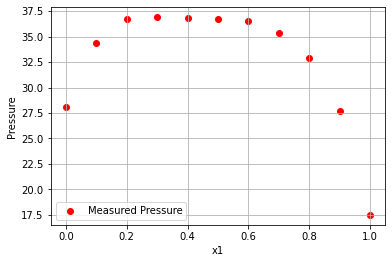

In [60]:
import matplotlib.pyplot as plt

# Initialize measured data storage arrays.
x = [x*0.1 for x in range(0,11)]

# pressure list
p = [28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5]

# Plot measured data.
plt.scatter(x, p, color='red')
plt.xlabel('x1')
plt.ylabel('Pressure')
plt.legend(['Measured Pressure'], loc="lower left")
plt.grid()
plt.show()

**Formulating the least square problem.**
$$\min_{A_{12}, A_{21}} \sum_{i=1}^{n} (p(x^{(i)}, A_{12},A_{21})-p^{(i)})^2  \quad \forall i=1,2,...11$$

such that  $$p(x^{(i)}, A_{12},A_{21})=x^{(i)}_1\exp\left(A_{12}\left(\frac{A_{21}x^{(i)}_2}{A_{12}x^{(i)}_1+A_{21}x^{(i)}_2}\right)^2\right)p_{water}^{sat} + x_2\exp\left(A_{21}\left(\frac{A_{12}x^{(i)}_1}{A_{12}x^{(i)}_1+A_{21}x^{(i)}_2}\right)^2\right)p_{1,4 dioxane}^{sat} $$
and $$ x_2 = 1-x_1 $$


To simplify, the minimization problem is formulated using a sum of squares method for the loss function. That is, each value calculated by the given model is subtracted from the measured value, squared, and summed, as follows (with $x_2 = 1 - x_1$):

$$
min_A   \sum_{i=1}^{N=11} \begin{pmatrix}p_i - x_{1,i}e^{A_{12}\begin{pmatrix}\frac{A_{21}(1 - x_{1,i})}{A_{12}x_{1,i} + A_{21}(1 - x_{1,i})}\end{pmatrix}^2}p^{sat}_{water} - (1 - x_{1,i})e^{A_{21}\begin{pmatrix}\frac{A_{12}x_{1,i}}{A_{12}x_{1,i} + A_{21}(1 - x_{1,i})}\end{pmatrix}^2}p^{sat}_{1, 4 dioxane}\end{pmatrix}^2
$$

The minimization solution of A12 & A21 are  [1.9578799 1.6896279]
The objective function is now  0.67021513


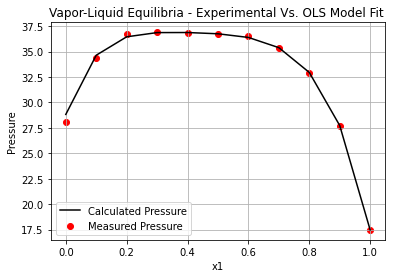

The model fits well with the data: True


In [61]:
import torch as t
import numpy as np
from math import *
import matplotlib.pyplot as plt
from random import random

# Calculate saturation pressures with given values and Antoine equation.
a = [[8.07131, 1730.63, 233.426], [7.43155, 1554.679, 240.337]]
T = 20
p_sat_water = 10**(a[0][0] - a[0][1]/(T + a[0][2]))
p_sat_dioxane = 10**(a[1][0] - a[1][1]/(T + a[1][2]))

# Initialize measured data storage arrays.
x = [x*0.1 for x in range(0,11)]
p = [28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5]

# Define variable A.
A = t.autograd.Variable(t.tensor([random(), random()]), requires_grad=True)

# Define loss function.
def compute_loss(x, p, A):
    f = t.zeros(len(p))
    for i in range(len(p)):
        f[i] = (p[i] - x[i]*p_sat_water*t.exp(A[0]*(A[1]*(1 - x[i])/(A[0]*x[i] + A[1]*(1 - x[i])))**2)
                - (1 - x[i])*p_sat_dioxane*t.exp(A[1]*(A[0]*x[i]/(A[0]*x[i] + A[1]*(1 - x[i])))**2))**2
    return t.sum(f)

# Define line search algorithm.
def line_search(x, p, A, k):
    with t.no_grad():
        alpha = 0.001
        phi = compute_loss(x, p, A) - alpha*k*t.dot(A.grad, A.grad)
        #compute untill phi<compute_loss
        while phi < compute_loss(x, p, A - alpha*A.grad):
            alpha = 0.5*alpha
            phi = compute_loss(x, p, A) - alpha * k * t.dot(A.grad, A.grad)
        return alpha

# Perform gradient descent with line search.
for j in range(200):
    loss = compute_loss(x, p, A)
    loss.backward()

    alpha = line_search(x, p, A, 0.8)
    # step size; alpha = 0.001

    with t.no_grad():
        A -= alpha*A.grad
        A.grad.zero_()

# Print solution and minimum loss.
print('The minimization solution of A12 & A21 are ',A.data.numpy())
print('The objective function is now ',loss.data.numpy())

# Calculate pressure with minimization solution for A.
soln = A.data.numpy()
p_soln = []
for i in range(len(x)):
    p_soln.append([])
    p_soln[i] = x[i] * p_sat_water * exp(
        soln[0] * (soln[1] * (1 - x[i]) / (soln[0] * x[i] + soln[1] * (1 - x[i]))) ** 2) + \
                (1 - x[i]) * p_sat_dioxane * exp(
        soln[1] * (soln[0] * x[i] / (soln[0] * x[i] + soln[1] * (1 - x[i]))) ** 2)

plt.title('Vapor-Liquid Equilibria - Experimental Vs. OLS Model Fit ')
plt.scatter(x, p, color='red')
plt.plot(x, p_soln, color='black')
plt.xlabel('x1')
plt.ylabel('Pressure')
plt.legend(['Calculated Pressure', 'Measured Pressure'])
plt.grid()
plt.show()

print('The model fits well with the data:', np.allclose(p_soln, p, rtol=1e-1))

The minimization solution for $A_{12}$ and $A_{21}$ values were determined to be 1.96 and 1.69, respectively. The plot above shows the measured pressure data (red) and the pressure calculated with this solution (black). 

Hence, from the inspection we can see that using OLS to evaluate the two constants is a viable method and the model fits quite well when compared to the experimatal data both in shape and magnitude.

### **Q2.**

Solve the following problem using Bayesian Optimization:
$$
    \min_{x_1, x_2} \quad \left(4-2.1x_1^2 + \frac{x_1^4}{3}\right)x_1^2 + x_1x_2 + \left(-4 + 4x_2^2\right)x_2^2,
$$
for $x_1 \in [-3,3]$ and $x_2 \in [-2,2]$.

**Solution:**

In [62]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
import numpy as np
from bayes_opt import BayesianOptimization

In [64]:
def objective(x1,x2):
  return -(4*x1**2 - 2.1*x1**4 + (x1**6)/3 + x1*x2 - 4*x2**2 + 4*x2**4)

In [65]:
pbounds = {'x1':(-3,3),'x2':(-2,2)}
optimizer = BayesianOptimization(
    f = objective,
    pbounds = pbounds,
    random_state = 1,
)

In [66]:
optimizer.maximize(
    init_points = 10,
    n_iter = 100
)

|   iter    |  target   |    x1     |    x2     |
-------------------------------------------------
|  1        |  0.265    | -0.4979   |  0.8813   |
|  2        | -110.1    | -2.999    | -0.7907   |
|  3        | -26.91    | -2.119    | -1.631    |
|  4        | -2.856    | -1.882    | -0.6178   |
|  5        | -1.054    | -0.6194   |  0.1553   |
|  6        |  0.5211   | -0.4848   |  0.7409   |
|  7        | -11.28    | -1.773    |  1.512    |
|  8        | -66.76    | -2.836    |  0.6819   |
|  9        | -0.5377   | -0.4962   |  0.2348   |
|  10       | -12.02    | -2.158    | -1.208    |
|  11       | -6.707    | -0.6913   | -1.287    |
|  12       | -4.507    |  1.223    |  1.081    |
|  13       | -0.5198   |  1.354    | -0.6292   |
|  14       | -65.32    |  2.812    |  0.1161   |
|  15       | -48.23    |  1.016    | -2.0      |
|  16       | -49.11    |  0.3388   |  2.0      |
|  17       | -1.532    |  0.7023   |  0.103    |
|  18       | -68.92    |  2.385    |  2.0      |


In [67]:
a = optimizer.max
print(f"The minima of the function is: {-a['target']} at {a['params']}")

The minima of the function is: -1.0315263295837684 at {'x1': 0.084951558381297, 'x2': -0.7134360380710894}


**Another method:** I have used a Thomas Huijsken's tutorial on Bayesian Optimization which can be found [here](https://thuijskens.github.io/2016/12/29/bayesian-optimisation/).

In [69]:
import numpy as np
import sklearn.gaussian_process as gp

from scipy.stats import norm
from scipy.optimize import minimize
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification

def expected_improvement(x, gaussian_process, evaluated_loss, greater_is_better=False, n_params=1):
    
    x_to_predict = x.reshape(-1, n_params)

    mu, sigma = gaussian_process.predict(x_to_predict, return_std=True)

    if greater_is_better:
        loss_optimum = np.max(evaluated_loss)
    else:
        loss_optimum = np.min(evaluated_loss)

    scaling_factor = (-1) ** (not greater_is_better)

    # In case sigma equals zero
    with np.errstate(divide='ignore'):
        Z = scaling_factor * (mu - loss_optimum) / sigma
        expected_improvement = scaling_factor * (mu - loss_optimum) * norm.cdf(Z) + sigma * norm.pdf(Z)
        expected_improvement[sigma == 0.0] == 0.0

    return -1 * expected_improvement

def sample_next_hyperparameter(acquisition_func, gaussian_process, evaluated_loss, greater_is_better=False,
                               bounds=(0, 10), n_restarts=25):
    best_x = None
    best_acquisition_value = 1
    n_params = bounds.shape[0]

    for starting_point in np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_restarts, n_params)):

        res = minimize(fun=acquisition_func,
                       x0=starting_point.reshape(1, -1),
                       bounds=bounds,
                       method='L-BFGS-B',
                       args=(gaussian_process, evaluated_loss, greater_is_better, n_params))

        if res.fun < best_acquisition_value:
            best_acquisition_value = res.fun
            best_x = res.x

    return best_x
     

#%% Bayesian Optimization function to process yp and xp.

def bayesian_optimisation(n_iters, sample_loss, bounds, x0=None, n_pre_samples=5,
                          gp_params=None, random_search=False, alpha=1e-5, epsilon=1e-7):
   
    x_list = []
    y_list = []

    n_params = bounds.shape[0]

    if x0 is None:
        for params in np.random.uniform(bounds[:, 0], bounds[:, 1], (n_pre_samples, bounds.shape[0])):
            x_list.append(params)
            y_list.append(sample_loss(params))
    else:
        for params in x0:
            x_list.append(params)
            y_list.append(sample_loss(params))

    xp = np.array(x_list)
    yp = np.array(y_list)

    # Create the GP
    if gp_params is not None:
        model = gp.GaussianProcessRegressor(**gp_params)
    else:
        kernel = gp.kernels.Matern()
        model = gp.GaussianProcessRegressor(kernel=kernel,
                                            alpha=alpha,
                                            n_restarts_optimizer=10,
                                            normalize_y=True)

    for n in range(n_iters):

        model.fit(xp, yp)

        # Sample next hyperparameter
        if random_search:
            x_random = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(random_search, n_params))
            ei = -1 * expected_improvement(x_random, model, yp, greater_is_better=True, n_params=n_params)
            next_sample = x_random[np.argmax(ei), :]
        else:
            next_sample = sample_next_hyperparameter(expected_improvement, model, yp, greater_is_better=True, bounds=bounds, n_restarts=100)

        # Duplicates will break the GP. In case of a duplicate, we will randomly sample a next query point.
        if np.any(np.abs(next_sample - xp) <= epsilon):
            next_sample = np.random.uniform(bounds[:, 0], bounds[:, 1], bounds.shape[0])

        # Sample loss for new set of parameters
        cv_score = sample_loss(next_sample)

        # Update lists
        x_list.append(next_sample)
        y_list.append(cv_score)

        # Update xp and yp
        xp = np.array(x_list)
        yp = np.array(y_list)

    return xp, yp

# loss/objective function
def sample_loss(x): # takes in a vector [x1,x2]
    x1=x[0]
    x2=x[1]    
    return -1*((4 - 2.1*x1**2 + (x1**4)/3)*x1**2 + x1*x2 + (-4 + 4*(x2**2))*x2**2)

In [70]:
x_1 = np.linspace(-3,3)
#print("x1=",x_1)
x_2 = np.linspace(-2,2)
#print("x2=",x_1)

In [71]:
# We need the cartesian combination of these two vectors
param_grid = np.array([[x1i, x2i] for x1i in x_1 for x2i in x_2])

# compute actual loss
real_loss = [sample_loss(params) for params in param_grid]

# The maximum is at:
print('The true minimum value of ' + str(-np.amax(real_loss)) +' is at '+ str(param_grid[np.array(real_loss).argmax(), :]))

The true minimum value of -1.02614400718987 is at [-0.06122449  0.69387755]


In [72]:
import warnings
warnings.filterwarnings('ignore') 

#define bounds
bounds = np.array([[-3, 3], [-2, 2]])

print('running Bayesian Opt:')
# process xp and yp , call bayesian_optimisation defined in above cell
xp, yp = bayesian_optimisation(n_iters=100, 
                               sample_loss=sample_loss, 
                               bounds=bounds,
                               n_pre_samples=3,
                               random_search=100000)

print('Out of 100 iterations, the minimum value of ' + str(-np.amax(yp)) +' is at ' + str(xp[np.where(yp == np.amax(yp))[0][0]]))

running Bayesian Opt:
Out of 100 iterations, the minimum value of -1.0304091439787317 is at [-0.09349422  0.7008426 ]
